# 2. Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path
import seaborn as sns
import plotly.express as px
import os
%matplotlib inline

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2     

from PIL import Image

#image reader
import imageio.v2 as imageio

import shutil

#### Sample image

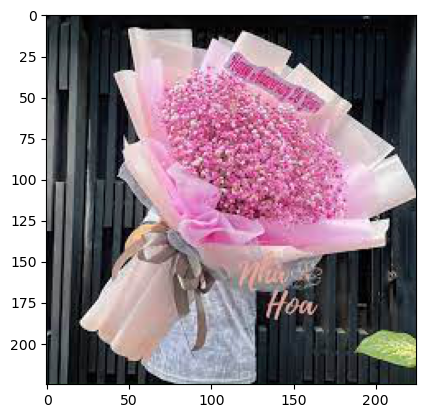

In [2]:
sample_path="Flowers/Flowers/Babi/babi_1.jpg"
source_folder = "Flowers/Flowers"
destination_folder = r"Flowers_Cleaned/Flowers"

#read image
img = mpimg.imread(sample_path)

#show image
plt.imshow(img)

#### Noise Removal
This step removes the small dots/patches which have high intensity compared to the rest of the image for smoothening of the image. OpenCV’s fast Nl Means Denoising Coloured function can do that easily.

In [3]:
def remove_noise(image):
    return cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 15)

In [4]:
def show_before_after(img,img_after,title_after):
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.imshow(img)
    plt.title("Original")

    plt.subplot(1,3,2)
    plt.imshow(img_after)
    plt.title(title_after)

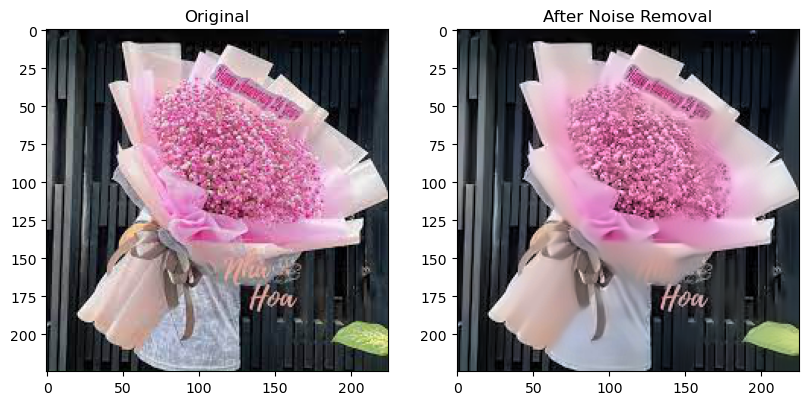

In [5]:
show_before_after(img,remove_noise(img),"After Noise Removal")

#### Normalization
This process changes the range of pixel intensity values. The purpose of performing normalization is to bring image to range that is normal to sense.

In [6]:
def normalization(img):
    norm_img = np.zeros((img.shape[0], img.shape[1]))
    return cv2.normalize(img, norm_img, 0, 255, cv2.NORM_MINMAX)


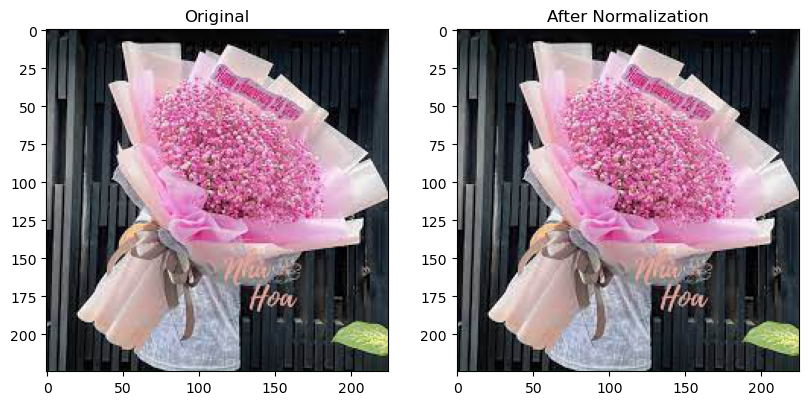

In [7]:
show_before_after(img,normalization(img),"After Normalization")

#### Detect corrupt image

It is crucial to detect corrupted images, as they can negatively impact the performance of a machine learning model or computer vision system. Images that have been corrupted may contain noise, artifacts, or other anomalies that can lead to misclassifications or output errors. Improve the accuracy and dependability of a model or system by detecting and removing these images from the dataset. In addition, corrupted images can cause biases in the model or system, which can lead to erroneous results or unjust decisions.

In [8]:
def clone_folder():
    shutil.copytree(source_folder, destination_folder)
    print('Copied')

In [9]:
clone_folder()

Copied


In [10]:
from pathlib import Path

corrupted_image = list()
accu = 0

for root, dirs, files in os.walk(destination_folder):
    for name in dirs:
        print(os.path.join(root, name))
        for image_file in Path(os.path.join(root, name)).glob('*.jpg'):
          accu = accu + 1
          try :
                img = imageio.imread(image_file)
                remove_noise(img)
                normalization(img)
          except :
              print(f'Cannot read image {image_file}')
              corrupted_image.append(image_file)
print("Total number of images : ", accu)

Flowers_Cleaned/Flowers\Babi
Flowers_Cleaned/Flowers\Calimerio
Flowers_Cleaned/Flowers\Chrysanthemum
Flowers_Cleaned/Flowers\Hydrangeas
Flowers_Cleaned/Flowers\Lisianthus
Flowers_Cleaned/Flowers\Pingpong
Flowers_Cleaned/Flowers\Rosy
Flowers_Cleaned/Flowers\Tana
Total number of images :  4621


In [11]:
len(corrupted_image)

0

#### Image duplication detection

Duplicate image detection is essential for multiple reasons:

* <b>Reducing storage</b>: Storing duplicate images wastes storage space, and detecting and removing them can help reduce storage costs.

* <b>Improving efficiency</b>: Processing or analyzing duplicate images is inefficient and time-consuming. Removing duplicates can improve processing and analysis efficiency.

* <b>Enhancing accuracy</b>: Duplicate images can bias the results of image-based analysis, such as object detection or image classification. Removing duplicates can improve the accuracy of these analyses.

* <b>Maintaining data integrity</b>: Duplicates can lead to confusion and inconsistency in data, especially when dealing with large image datasets. Removing duplicates helps to maintain data integrity and consistency.

In [12]:
def show_dupes(img_name1, img_name2):
    fig = plt.figure()
    
    ax = fig.add_subplot(1, 2, 1)
    imgplot = plt.imshow(Image.open(img_name1))
    title_name1=os.path.basename(img_name1).split('/')[-1]
    ax.set_title(title_name1)
    
    ax = fig.add_subplot(1, 2, 2)
    imgplot = plt.imshow(Image.open(img_name2))
    title_name2=os.path.basename(img_name2).split('/')[-1]
    ax.set_title(title_name2)

In [14]:
import imagehash
import glob

hashes = {}
duplicated = []   

# Define a function to compute the hash of an image file
def compute_hash(filepath):
    with Image.open(filepath) as img:
        return str(imagehash.phash(img))
    
# Define a function to find and remove duplicated images
def check_duplicates(rootdir):
    duplicated = []
    rootdir = glob.glob(rootdir)
    for folder in rootdir:
        print()
        print(folder)
        for image_dir in glob.glob(folder+'/*.jpg'):
            # Compute the hash of the image file
            file_hash = compute_hash(image_dir)
            # Check if this hash has already been seen
            file=os.path.basename(image_dir).split('/')[-1]
            if file_hash in hashes:
                # if the image hash exists already, save the collision filenames
                dupe_idx = hashes[file_hash]
                duplicated.append((dupe_idx, image_dir))
            else:
                # This file is not a duplicate, so remember its hash
                hashes[file_hash] = image_dir
        print(r'Duplicated image in ',folder,' :',len(duplicated))
    if len(duplicated)>0:
        print(r'---- Examples of duplication ----')
        show_dupes(duplicated[0][0], duplicated[0][1])
        show_dupes(duplicated[1][0], duplicated[1][1])
        show_dupes(duplicated[2][0], duplicated[2][1])

# Define a function to find and remove duplicated images
def remove_duplicates(rootdir):
    rootdir = glob.glob(rootdir)
    for folder in rootdir:
        print()
        print(folder)
        for image_dir in glob.glob(folder+'/*.jpg'):
            # Compute the hash of the image file
            file_hash = compute_hash(image_dir)
            # Check if this hash has already been seen
            file=os.path.basename(image_dir).split('/')[-1]
            if file_hash in hashes:
                os.remove(image_dir)
                print(f'Removed duplicate file: {file}')


Flowers_Cleaned/Flowers\Babi
Duplicated image in  Flowers_Cleaned/Flowers\Babi  : 41

Flowers_Cleaned/Flowers\Calimerio
Duplicated image in  Flowers_Cleaned/Flowers\Calimerio  : 82

Flowers_Cleaned/Flowers\Chrysanthemum
Duplicated image in  Flowers_Cleaned/Flowers\Chrysanthemum  : 107

Flowers_Cleaned/Flowers\Hydrangeas
Duplicated image in  Flowers_Cleaned/Flowers\Hydrangeas  : 125

Flowers_Cleaned/Flowers\Lisianthus
Duplicated image in  Flowers_Cleaned/Flowers\Lisianthus  : 257

Flowers_Cleaned/Flowers\Pingpong
Duplicated image in  Flowers_Cleaned/Flowers\Pingpong  : 277

Flowers_Cleaned/Flowers\Rosy
Duplicated image in  Flowers_Cleaned/Flowers\Rosy  : 296

Flowers_Cleaned/Flowers\Tana
Duplicated image in  Flowers_Cleaned/Flowers\Tana  : 431
---- Examples of duplication ----


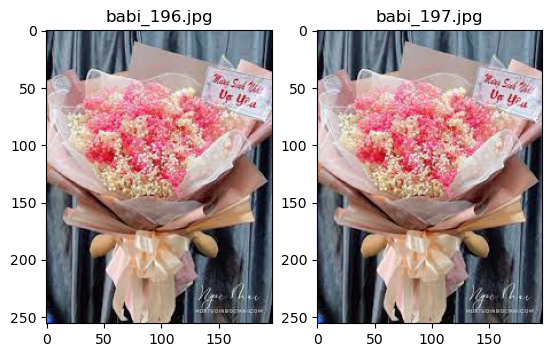

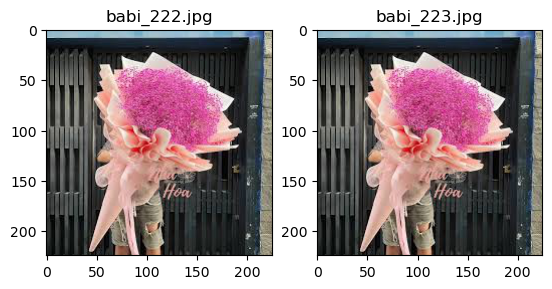

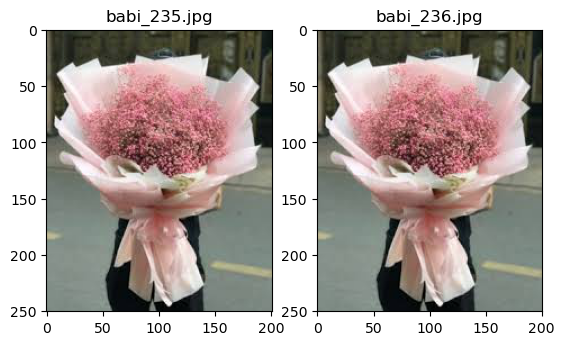

In [15]:
# Usage: specify the root directory to search for duplicates
check_duplicates('Flowers_Cleaned/Flowers/*')

In [16]:
remove_duplicates('Flowers_Cleaned/Flowers/*')


Flowers_Cleaned/Flowers\Babi
Removed duplicate file: babi_1.jpg
Removed duplicate file: babi_10.jpg
Removed duplicate file: babi_100.jpg
Removed duplicate file: babi_101.jpg
Removed duplicate file: babi_102.jpg
Removed duplicate file: babi_103.jpg
Removed duplicate file: babi_104.jpg
Removed duplicate file: babi_105.jpg
Removed duplicate file: babi_106.jpg
Removed duplicate file: babi_107.jpg
Removed duplicate file: babi_108.jpg
Removed duplicate file: babi_109.jpg
Removed duplicate file: babi_11.jpg
Removed duplicate file: babi_110.jpg
Removed duplicate file: babi_111.jpg
Removed duplicate file: babi_112.jpg
Removed duplicate file: babi_113.jpg
Removed duplicate file: babi_114.jpg
Removed duplicate file: babi_115.jpg
Removed duplicate file: babi_116.jpg
Removed duplicate file: babi_117.jpg
Removed duplicate file: babi_118.jpg
Removed duplicate file: babi_119.jpg
Removed duplicate file: babi_12.jpg
Removed duplicate file: babi_120.jpg
Removed duplicate file: babi_121.jpg
Removed dupli

Removed duplicate file: babi_336.jpg
Removed duplicate file: babi_337.jpg
Removed duplicate file: babi_338.jpg
Removed duplicate file: babi_339.jpg
Removed duplicate file: babi_34.jpg
Removed duplicate file: babi_340.jpg
Removed duplicate file: babi_341.jpg
Removed duplicate file: babi_342.jpg
Removed duplicate file: babi_343.jpg
Removed duplicate file: babi_344.jpg
Removed duplicate file: babi_345.jpg
Removed duplicate file: babi_346.jpg
Removed duplicate file: babi_347.jpg
Removed duplicate file: babi_348.jpg
Removed duplicate file: babi_349.jpg
Removed duplicate file: babi_35.jpg
Removed duplicate file: babi_350.jpg
Removed duplicate file: babi_351.jpg
Removed duplicate file: babi_352.jpg
Removed duplicate file: babi_353.jpg
Removed duplicate file: babi_354.jpg
Removed duplicate file: babi_355.jpg
Removed duplicate file: babi_356.jpg
Removed duplicate file: babi_357.jpg
Removed duplicate file: babi_358.jpg
Removed duplicate file: babi_359.jpg
Removed duplicate file: babi_36.jpg
Remo

Removed duplicate file: babi_63.jpg
Removed duplicate file: babi_630.jpg
Removed duplicate file: babi_631.jpg
Removed duplicate file: babi_632.jpg
Removed duplicate file: babi_633.jpg
Removed duplicate file: babi_634.jpg
Removed duplicate file: babi_635.jpg
Removed duplicate file: babi_636.jpg
Removed duplicate file: babi_637.jpg
Removed duplicate file: babi_638.jpg
Removed duplicate file: babi_639.jpg
Removed duplicate file: babi_64.jpg
Removed duplicate file: babi_640.jpg
Removed duplicate file: babi_641.jpg
Removed duplicate file: babi_642.jpg
Removed duplicate file: babi_643.jpg
Removed duplicate file: babi_644.jpg
Removed duplicate file: babi_645.jpg
Removed duplicate file: babi_646.jpg
Removed duplicate file: babi_647.jpg
Removed duplicate file: babi_648.jpg
Removed duplicate file: babi_649.jpg
Removed duplicate file: babi_65.jpg
Removed duplicate file: babi_650.jpg
Removed duplicate file: babi_651.jpg
Removed duplicate file: babi_652.jpg
Removed duplicate file: babi_653.jpg
Remo

Removed duplicate file: babi_907.jpg
Removed duplicate file: babi_908.jpg
Removed duplicate file: babi_909.jpg
Removed duplicate file: babi_91.jpg
Removed duplicate file: babi_910.jpg
Removed duplicate file: babi_911.jpg
Removed duplicate file: babi_912.jpg
Removed duplicate file: babi_913.jpg
Removed duplicate file: babi_914.jpg
Removed duplicate file: babi_915.jpg
Removed duplicate file: babi_916.jpg
Removed duplicate file: babi_917.jpg
Removed duplicate file: babi_918.jpg
Removed duplicate file: babi_919.jpg
Removed duplicate file: babi_92.jpg
Removed duplicate file: babi_920.jpg
Removed duplicate file: babi_921.jpg
Removed duplicate file: babi_922.jpg
Removed duplicate file: babi_923.jpg
Removed duplicate file: babi_924.jpg
Removed duplicate file: babi_925.jpg
Removed duplicate file: babi_926.jpg
Removed duplicate file: babi_927.jpg
Removed duplicate file: babi_928.jpg
Removed duplicate file: babi_929.jpg
Removed duplicate file: babi_93.jpg
Removed duplicate file: babi_930.jpg
Remo

Removed duplicate file: calimero_3.jpg
Removed duplicate file: calimero_30.jpg
Removed duplicate file: calimero_300.jpg
Removed duplicate file: calimero_301.jpg
Removed duplicate file: calimero_302.jpg
Removed duplicate file: calimero_303.jpg
Removed duplicate file: calimero_304.jpg
Removed duplicate file: calimero_305.jpg
Removed duplicate file: calimero_306.jpg
Removed duplicate file: calimero_307.jpg
Removed duplicate file: calimero_308.jpg
Removed duplicate file: calimero_309.jpg
Removed duplicate file: calimero_31.jpg
Removed duplicate file: calimero_310.jpg
Removed duplicate file: calimero_311.jpg
Removed duplicate file: calimero_312.jpg
Removed duplicate file: calimero_313.jpg
Removed duplicate file: calimero_314.jpg
Removed duplicate file: calimero_315.jpg
Removed duplicate file: calimero_316.jpg
Removed duplicate file: calimero_317.jpg
Removed duplicate file: calimero_318.jpg
Removed duplicate file: calimero_319.jpg
Removed duplicate file: calimero_32.jpg
Removed duplicate fil

Removed duplicate file: chrysanthemum_220.jpg
Removed duplicate file: chrysanthemum_221.jpg
Removed duplicate file: chrysanthemum_222.jpg
Removed duplicate file: chrysanthemum_223.jpg
Removed duplicate file: chrysanthemum_224.jpg
Removed duplicate file: chrysanthemum_225.jpg
Removed duplicate file: chrysanthemum_226.jpg
Removed duplicate file: chrysanthemum_227.jpg
Removed duplicate file: chrysanthemum_228.jpg
Removed duplicate file: chrysanthemum_229.jpg
Removed duplicate file: chrysanthemum_23.jpg
Removed duplicate file: chrysanthemum_230.jpg
Removed duplicate file: chrysanthemum_231.jpg
Removed duplicate file: chrysanthemum_232.jpg
Removed duplicate file: chrysanthemum_233.jpg
Removed duplicate file: chrysanthemum_234.jpg
Removed duplicate file: chrysanthemum_235.jpg
Removed duplicate file: chrysanthemum_236.jpg
Removed duplicate file: chrysanthemum_237.jpg
Removed duplicate file: chrysanthemum_238.jpg
Removed duplicate file: chrysanthemum_239.jpg
Removed duplicate file: chrysanthem

Removed duplicate file: chrysanthemum_504.jpg
Removed duplicate file: chrysanthemum_505.jpg
Removed duplicate file: chrysanthemum_506.jpg
Removed duplicate file: chrysanthemum_507.jpg
Removed duplicate file: chrysanthemum_508.jpg
Removed duplicate file: chrysanthemum_509.jpg
Removed duplicate file: chrysanthemum_51.jpg
Removed duplicate file: chrysanthemum_510.jpg
Removed duplicate file: chrysanthemum_511.jpg
Removed duplicate file: chrysanthemum_512.jpg
Removed duplicate file: chrysanthemum_513.jpg
Removed duplicate file: chrysanthemum_514.jpg
Removed duplicate file: chrysanthemum_515.jpg
Removed duplicate file: chrysanthemum_516.jpg
Removed duplicate file: chrysanthemum_517.jpg
Removed duplicate file: chrysanthemum_518.jpg
Removed duplicate file: chrysanthemum_519.jpg
Removed duplicate file: chrysanthemum_52.jpg
Removed duplicate file: chrysanthemum_520.jpg
Removed duplicate file: chrysanthemum_521.jpg
Removed duplicate file: chrysanthemum_522.jpg
Removed duplicate file: chrysanthemu

Removed duplicate file: hydrangeas_178.jpg
Removed duplicate file: hydrangeas_179.jpg
Removed duplicate file: hydrangeas_18.jpg
Removed duplicate file: hydrangeas_180.jpg
Removed duplicate file: hydrangeas_181.jpg
Removed duplicate file: hydrangeas_182.jpg
Removed duplicate file: hydrangeas_183.jpg
Removed duplicate file: hydrangeas_184.jpg
Removed duplicate file: hydrangeas_185.jpg
Removed duplicate file: hydrangeas_186.jpg
Removed duplicate file: hydrangeas_187.jpg
Removed duplicate file: hydrangeas_188.jpg
Removed duplicate file: hydrangeas_189.jpg
Removed duplicate file: hydrangeas_19.jpg
Removed duplicate file: hydrangeas_190.jpg
Removed duplicate file: hydrangeas_191.jpg
Removed duplicate file: hydrangeas_192.jpg
Removed duplicate file: hydrangeas_193.jpg
Removed duplicate file: hydrangeas_194.jpg
Removed duplicate file: hydrangeas_195.jpg
Removed duplicate file: hydrangeas_196.jpg
Removed duplicate file: hydrangeas_197.jpg
Removed duplicate file: hydrangeas_198.jpg
Removed dupli

Removed duplicate file: hydrangeas_481.jpg
Removed duplicate file: hydrangeas_482.jpg
Removed duplicate file: hydrangeas_483.jpg
Removed duplicate file: hydrangeas_484.jpg
Removed duplicate file: hydrangeas_485.jpg
Removed duplicate file: hydrangeas_486.jpg
Removed duplicate file: hydrangeas_487.jpg
Removed duplicate file: hydrangeas_488.jpg
Removed duplicate file: hydrangeas_489.jpg
Removed duplicate file: hydrangeas_49.jpg
Removed duplicate file: hydrangeas_490.jpg
Removed duplicate file: hydrangeas_491.jpg
Removed duplicate file: hydrangeas_492.jpg
Removed duplicate file: hydrangeas_493.jpg
Removed duplicate file: hydrangeas_494.jpg
Removed duplicate file: hydrangeas_495.jpg
Removed duplicate file: hydrangeas_496.jpg
Removed duplicate file: hydrangeas_497.jpg
Removed duplicate file: hydrangeas_498.jpg
Removed duplicate file: hydrangeas_499.jpg
Removed duplicate file: hydrangeas_5.jpg
Removed duplicate file: hydrangeas_50.jpg
Removed duplicate file: hydrangeas_500.jpg
Removed duplica

Removed duplicate file: lisianthus_314.jpg
Removed duplicate file: lisianthus_315.jpg
Removed duplicate file: lisianthus_316.jpg
Removed duplicate file: lisianthus_317.jpg
Removed duplicate file: lisianthus_318.jpg
Removed duplicate file: lisianthus_319.jpg
Removed duplicate file: lisianthus_32.jpg
Removed duplicate file: lisianthus_320.jpg
Removed duplicate file: lisianthus_321.jpg
Removed duplicate file: lisianthus_322.jpg
Removed duplicate file: lisianthus_323.jpg
Removed duplicate file: lisianthus_324.jpg
Removed duplicate file: lisianthus_325.jpg
Removed duplicate file: lisianthus_326.jpg
Removed duplicate file: lisianthus_327.jpg
Removed duplicate file: lisianthus_328.jpg
Removed duplicate file: lisianthus_329.jpg
Removed duplicate file: lisianthus_33.jpg
Removed duplicate file: lisianthus_330.jpg
Removed duplicate file: lisianthus_331.jpg
Removed duplicate file: lisianthus_332.jpg
Removed duplicate file: lisianthus_333.jpg
Removed duplicate file: lisianthus_334.jpg
Removed dupli

Removed duplicate file: lisianthus_615.jpg
Removed duplicate file: lisianthus_616.jpg
Removed duplicate file: lisianthus_617.jpg
Removed duplicate file: lisianthus_618.jpg
Removed duplicate file: lisianthus_619.jpg
Removed duplicate file: lisianthus_62.jpg
Removed duplicate file: lisianthus_620.jpg
Removed duplicate file: lisianthus_621.jpg
Removed duplicate file: lisianthus_622.jpg
Removed duplicate file: lisianthus_623.jpg
Removed duplicate file: lisianthus_624.jpg
Removed duplicate file: lisianthus_625.jpg
Removed duplicate file: lisianthus_626.jpg
Removed duplicate file: lisianthus_627.jpg
Removed duplicate file: lisianthus_628.jpg
Removed duplicate file: lisianthus_629.jpg
Removed duplicate file: lisianthus_63.jpg
Removed duplicate file: lisianthus_630.jpg
Removed duplicate file: lisianthus_631.jpg
Removed duplicate file: lisianthus_632.jpg
Removed duplicate file: lisianthus_633.jpg
Removed duplicate file: lisianthus_634.jpg
Removed duplicate file: lisianthus_635.jpg
Removed dupli

Removed duplicate file: lisianthus_901.jpg
Removed duplicate file: lisianthus_902.jpg
Removed duplicate file: lisianthus_903.jpg
Removed duplicate file: lisianthus_904.jpg
Removed duplicate file: lisianthus_905.jpg
Removed duplicate file: lisianthus_906.jpg
Removed duplicate file: lisianthus_907.jpg
Removed duplicate file: lisianthus_908.jpg
Removed duplicate file: lisianthus_909.jpg
Removed duplicate file: lisianthus_91.jpg
Removed duplicate file: lisianthus_910.jpg
Removed duplicate file: lisianthus_911.jpg
Removed duplicate file: lisianthus_912.jpg
Removed duplicate file: lisianthus_913.jpg
Removed duplicate file: lisianthus_914.jpg
Removed duplicate file: lisianthus_915.jpg
Removed duplicate file: lisianthus_916.jpg
Removed duplicate file: lisianthus_917.jpg
Removed duplicate file: lisianthus_918.jpg
Removed duplicate file: lisianthus_919.jpg
Removed duplicate file: lisianthus_92.jpg
Removed duplicate file: lisianthus_920.jpg
Removed duplicate file: lisianthus_921.jpg
Removed dupli

Removed duplicate file: pingpong_291.jpg
Removed duplicate file: pingpong_292.jpg
Removed duplicate file: pingpong_293.jpg
Removed duplicate file: pingpong_294.jpg
Removed duplicate file: pingpong_295.jpg
Removed duplicate file: pingpong_296.jpg
Removed duplicate file: pingpong_297.jpg
Removed duplicate file: pingpong_298.jpg
Removed duplicate file: pingpong_299.jpg
Removed duplicate file: pingpong_3.jpg
Removed duplicate file: pingpong_30.jpg
Removed duplicate file: pingpong_300.jpg
Removed duplicate file: pingpong_301.jpg
Removed duplicate file: pingpong_302.jpg
Removed duplicate file: pingpong_303.jpg
Removed duplicate file: pingpong_304.jpg
Removed duplicate file: pingpong_305.jpg
Removed duplicate file: pingpong_306.jpg
Removed duplicate file: pingpong_307.jpg
Removed duplicate file: pingpong_308.jpg
Removed duplicate file: pingpong_309.jpg
Removed duplicate file: pingpong_31.jpg
Removed duplicate file: pingpong_310.jpg
Removed duplicate file: pingpong_311.jpg
Removed duplicate fi

Removed duplicate file: rosy_27.jpg
Removed duplicate file: rosy_28.jpg
Removed duplicate file: rosy_29.jpg
Removed duplicate file: rosy_3.jpg
Removed duplicate file: rosy_30.jpg
Removed duplicate file: rosy_31.jpg
Removed duplicate file: rosy_32.jpg
Removed duplicate file: rosy_33.jpg
Removed duplicate file: rosy_34.jpg
Removed duplicate file: rosy_35.jpg
Removed duplicate file: rosy_36.jpg
Removed duplicate file: rosy_37.jpg
Removed duplicate file: rosy_38.jpg
Removed duplicate file: rosy_39.jpg
Removed duplicate file: rosy_4.jpg
Removed duplicate file: rosy_40.jpg
Removed duplicate file: rosy_41.jpg
Removed duplicate file: rosy_42.jpg
Removed duplicate file: rosy_43.jpg
Removed duplicate file: rosy_44.jpg
Removed duplicate file: rosy_45.jpg
Removed duplicate file: rosy_46.jpg
Removed duplicate file: rosy_47.jpg
Removed duplicate file: rosy_48.jpg
Removed duplicate file: rosy_49.jpg
Removed duplicate file: rosy_5.jpg
Removed duplicate file: rosy_50.jpg
Removed duplicate file: rosy_51

Removed duplicate file: tana_249.jpg
Removed duplicate file: tana_25.jpg
Removed duplicate file: tana_250.jpg
Removed duplicate file: tana_251.jpg
Removed duplicate file: tana_252.jpg
Removed duplicate file: tana_253.jpg
Removed duplicate file: tana_254.jpg
Removed duplicate file: tana_255.jpg
Removed duplicate file: tana_256.jpg
Removed duplicate file: tana_257.jpg
Removed duplicate file: tana_258.jpg
Removed duplicate file: tana_259.jpg
Removed duplicate file: tana_26.jpg
Removed duplicate file: tana_260.jpg
Removed duplicate file: tana_261.jpg
Removed duplicate file: tana_262.jpg
Removed duplicate file: tana_263.jpg
Removed duplicate file: tana_264.jpg
Removed duplicate file: tana_265.jpg
Removed duplicate file: tana_266.jpg
Removed duplicate file: tana_267.jpg
Removed duplicate file: tana_268.jpg
Removed duplicate file: tana_269.jpg
Removed duplicate file: tana_27.jpg
Removed duplicate file: tana_270.jpg
Removed duplicate file: tana_271.jpg
Removed duplicate file: tana_272.jpg
Remo

Removed duplicate file: tana_521.jpg
Removed duplicate file: tana_522.jpg
Removed duplicate file: tana_523.jpg
Removed duplicate file: tana_524.jpg
Removed duplicate file: tana_525.jpg
Removed duplicate file: tana_526.jpg
Removed duplicate file: tana_527.jpg
Removed duplicate file: tana_528.jpg
Removed duplicate file: tana_529.jpg
Removed duplicate file: tana_53.jpg
Removed duplicate file: tana_530.jpg
Removed duplicate file: tana_531.jpg
Removed duplicate file: tana_532.jpg
Removed duplicate file: tana_533.jpg
Removed duplicate file: tana_534.jpg
Removed duplicate file: tana_535.jpg
Removed duplicate file: tana_536.jpg
Removed duplicate file: tana_537.jpg
Removed duplicate file: tana_538.jpg
Removed duplicate file: tana_539.jpg
Removed duplicate file: tana_54.jpg
Removed duplicate file: tana_540.jpg
Removed duplicate file: tana_541.jpg
Removed duplicate file: tana_542.jpg
Removed duplicate file: tana_543.jpg
Removed duplicate file: tana_544.jpg
Removed duplicate file: tana_545.jpg
Rem

In [17]:
check_duplicates('Flowers_Cleaned/Flowers/*')


Flowers_Cleaned/Flowers\Babi
Duplicated image in  Flowers_Cleaned/Flowers\Babi  : 0

Flowers_Cleaned/Flowers\Calimerio
Duplicated image in  Flowers_Cleaned/Flowers\Calimerio  : 0

Flowers_Cleaned/Flowers\Chrysanthemum
Duplicated image in  Flowers_Cleaned/Flowers\Chrysanthemum  : 0

Flowers_Cleaned/Flowers\Hydrangeas
Duplicated image in  Flowers_Cleaned/Flowers\Hydrangeas  : 0

Flowers_Cleaned/Flowers\Lisianthus
Duplicated image in  Flowers_Cleaned/Flowers\Lisianthus  : 0

Flowers_Cleaned/Flowers\Pingpong
Duplicated image in  Flowers_Cleaned/Flowers\Pingpong  : 0

Flowers_Cleaned/Flowers\Rosy
Duplicated image in  Flowers_Cleaned/Flowers\Rosy  : 0

Flowers_Cleaned/Flowers\Tana
Duplicated image in  Flowers_Cleaned/Flowers\Tana  : 0
